In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from scipy.spatial.distance import cdist

In [140]:
df = pd.read_csv('ParisHousing.csv')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  object 
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
 16  category           1000

In [142]:
df.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [143]:
df = df[df.columns[1:]]

# NUMS

In [144]:
num_cols = ['squareMeters', 'basement', 'attic', 'garage', 'price', 'numberOfRooms', 'made', 'floors']

In [145]:
# for num, val in enumerate(num_cols, start=1):
#     print(num, val)
#     plt.figure(figsize=(10,20))
#     plt.subplot(len(num_cols),1,num)
#     plt.plot(df['price'], df[val])
#     plt.show()

In [146]:
d={}
for i in df['numberOfRooms'].unique():    
    d[i] = 0

In [147]:
xxx = {
    'three': 3,
 'thirty-nine': 39,
 'fifty-eight': 58,
 'forty-seven': 47,
 'nineteen': 19,
 'thirty-six': 36,
 'ten': 10,
 'one hundred': 100,
 'forty-two': 42,
 'twenty-one': 21,
 'seventy-four': 74,
 'thirty-one': 31,
 'forty-four': 44,
 'sixty': 60,
 'eighty-eight': 88,
 'thirty-seven': 37,
 'forty-three': 43,
 'sixty-four': 64,
 'twelve': 12,
 'fifty-one': 51,
 'fifty-six': 56,
 'forty-six': 46,
 'seventy-two': 72,
 'seven': 7,
 'ninety-eight': 98,
 'forty': 40,
 'seventy-eight': 78,
 'eighty-nine': 89,
 'twenty-nine': 29,
 'eighty-seven': 87,
 'eight': 8,
 'twenty-seven': 27,
 'fifty-nine': 59,
 'thirty-eight': 38,
 'forty-nine': 49,
 'sixty-six': 66,
 'twenty-two': 22,
 'ninety-seven': 97,
 'twenty-five': 25,
 'fifty-two': 52,
 'eleven': 11,
 'six': 6,
 'eighty-two': 82,
 'seventeen': 17,
 'fifty-seven': 57,
 'nine': 9,
 'fifteen': 15,
 'forty-eight': 48,
 'five': 5,
 'twenty-eight': 28,
 'twenty': 20,
 'sixty-seven': 67,
 'ninety-nine': 99,
  'seventy-three': 73,
 'fifty': 50,
 'sixty-nine': 69,
 'four': 4,
 'seventy-five': 75,
 'sixty-one': 61,
 'fifty-five': 55,
 'ninety-two': 92,
 'twenty-three': 23,
 'ninety-three': 93,
 'seventy-one': 71,
 'thirty-five': 35,
 'ninety-four': 94,
 'twenty-four': 24,
 'eighty-one': 81,
 'ninety-one': 91,
 'seventy-seven': 77,
 'sixty-eight': 68,
 'seventy': 17,
 'fifty-four': 54,
 'forty-five': 45,
 'sixty-three': 63,
 'eighty-four': 84,
 'thirty-four': 34,
 'seventy-six': 76,
 'ninety-six': 96,
 'one': 1,
 'ninety': 90,
 'ninety-five': 95,
 'eighteen': 18,
 'two': 2,
 'fifty-three': 53,
 'forty-one': 41,
 'twenty-six': 26,
 'sixteen': 16,
 'thirteen': 13,
 'sixty-five': 65,
 'eighty-three': 83,
 'sixty-two': 62,
 'seventy-nine': 79,
 'thirty': 30,
 'eighty-five': 85,
 'eighty': 80,
 'thirty-three': 33,
 'fourteen': 14,
 'thirty-two': 32,
 'eighty-six': 86}  


In [148]:
df['numberOfRooms'] = df['numberOfRooms'].map(xxx)

In [149]:
scaler = StandardScaler()
for i in num_cols:
    df[i] = scaler.fit_transform(df[i].values.reshape(-1,1))

In [150]:
df

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0.891562,-1.619073,0.440453,9373,3,8,-0.052484,False,True,-0.250333,1.374130,1.537488,False,7,0.891687,Basic,has pool and no yard
1,1.073956,-0.374810,1.652041,39381,8,6,1.021904,True,False,-0.479772,-0.895592,-1.622370,True,2,1.074814,Luxury,has pool and has yard
2,0.203033,0.281884,-1.082685,34457,6,8,1.666537,False,False,-0.728678,1.321265,-1.595657,True,9,0.201994,Basic,has pool and no yard
3,-0.610092,-0.098307,-1.532703,27939,10,4,0.699588,False,True,-1.520589,0.730080,-0.740816,False,3,-0.611997,Basic,no pool and no yard
4,0.714521,-1.066067,1.375106,38045,3,7,-1.664066,True,False,1.182616,-0.898010,-0.996505,True,4,0.716512,Luxury,has pool and has yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.673244,1.353333,-1.567320,73133,7,6,0.377271,False,True,1.487144,-1.150586,-1.278908,False,4,-1.674158,Basic,has pool and no yard
9996,-0.190009,-0.720439,-1.325002,34606,9,4,-1.664066,False,True,1.400235,-1.135383,-1.233113,False,0,-0.189406,Basic,has pool and has yard
9997,1.180654,-1.619073,0.648154,80933,10,10,-0.052484,True,True,1.137076,0.933592,-0.794243,True,9,1.180484,Basic,no pool and no yard
9998,0.318559,-1.135193,1.582807,55856,1,3,0.484710,False,True,-0.849307,0.395962,-0.817141,True,4,0.316848,Basic,no pool and no yard


# CATS

In [151]:
cats = [
#     'numberOfRooms',
#     'floors',
    'cityCode',
    'cityPartRange',
    'numPrevOwners',
    #         'made',
    'hasGuestRoom',
    'category',
    'PoolAndYard']

In [152]:
bins = ['isNewBuilt',
        'hasStormProtector',
        'hasStorageRoom']

In [153]:
df['floors'] = df['floors'].apply(lambda x:round(x, -1))

In [154]:
df['cityCode'] = df['cityCode'].apply(lambda x:round(x, -4))

In [155]:
df['made'] = df['made'].apply(lambda x:round(x, -1))

In [156]:
# df['numberOfRooms'].value_counts().hist()
# plt.title('numbersofRooms')

In [157]:
def show_plt(cats):    
    for num, val in enumerate(cats, start=1):
        plt.figure(figsize=(8, 45))
        plt.subplot(len(cats), 1, num)
        df[val].hist(bins=20)
        plt.title(val)
        plt.show()
        print( df[val].unique(), df[val].nunique())

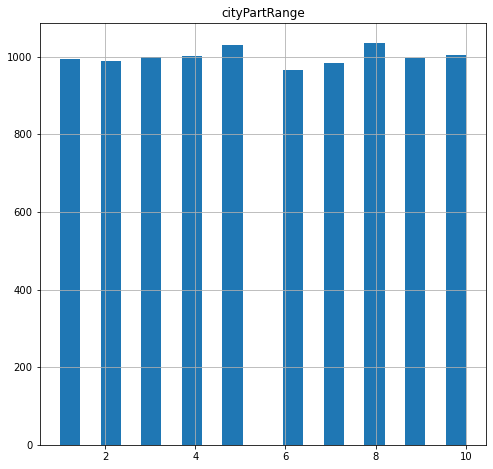

[ 3  8  6 10  5  4  2  7  9  1] 10


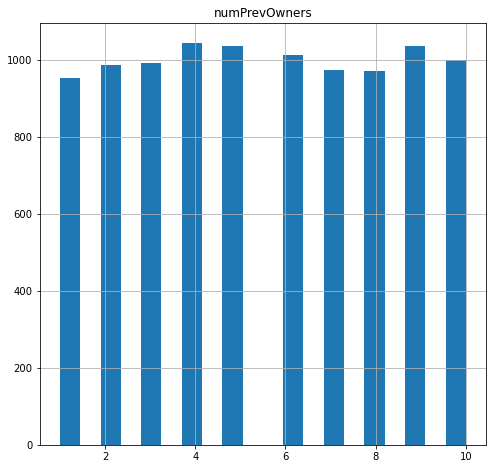

[ 8  6  4  7  9  3  2  5  1 10] 10


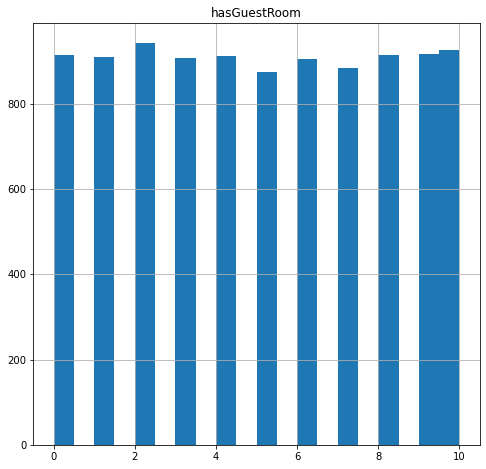

[ 7  2  9  3  4  1  5 10  0  8  6] 11


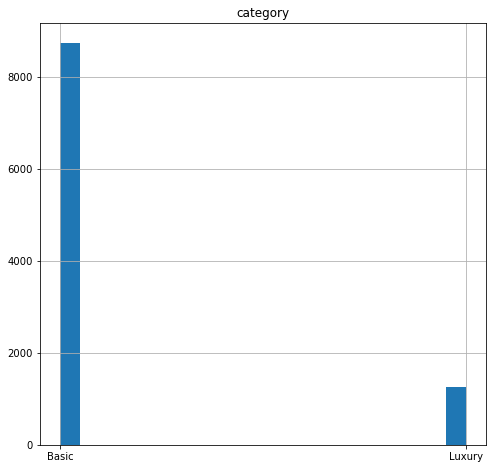

['Basic' 'Luxury'] 2


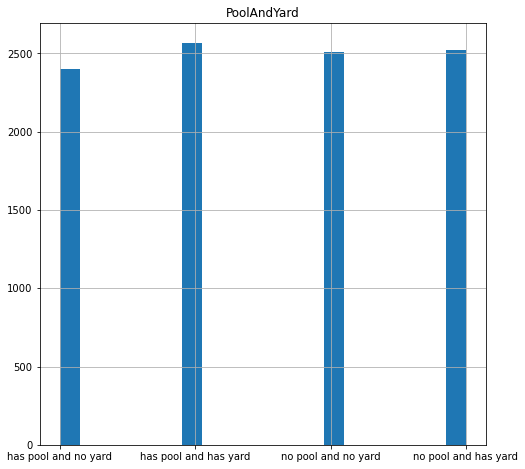

['has pool and no yard' 'has pool and has yard' 'no pool and no yard'
 'no pool and has yard'] 4


In [158]:
show_plt(cats[1:])

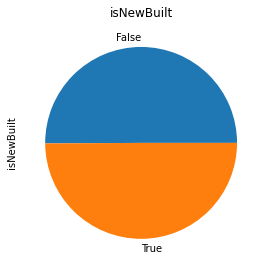

[False  True] 2


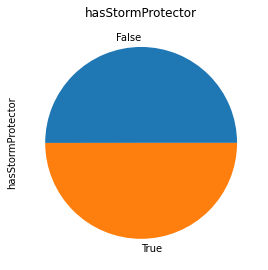

[ True False] 2


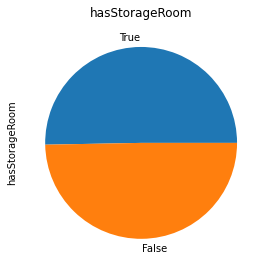

[False  True] 2


In [159]:
for num, val in enumerate(bins, start=1):
        plt.figure(figsize=(8, 15))
        plt.subplot(len(bins), 1, num)
        df[val].value_counts().plot(kind='pie')
        plt.title(val)
        plt.show()
        print( df[val].unique(), df[val].nunique())

In [160]:
for i in bins:    
    df[i] = df[i].map({True:1, False:0})

In [161]:
df

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0.891562,-1.619073,0.0,10000,3,8,-0.0,0,1,-0.250333,1.374130,1.537488,0,7,0.891687,Basic,has pool and no yard
1,1.073956,-0.374810,0.0,40000,8,6,0.0,1,0,-0.479772,-0.895592,-1.622370,1,2,1.074814,Luxury,has pool and has yard
2,0.203033,0.281884,-0.0,30000,6,8,0.0,0,0,-0.728678,1.321265,-1.595657,1,9,0.201994,Basic,has pool and no yard
3,-0.610092,-0.098307,-0.0,30000,10,4,0.0,0,1,-1.520589,0.730080,-0.740816,0,3,-0.611997,Basic,no pool and no yard
4,0.714521,-1.066067,0.0,40000,3,7,-0.0,1,0,1.182616,-0.898010,-0.996505,1,4,0.716512,Luxury,has pool and has yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.673244,1.353333,-0.0,70000,7,6,0.0,0,1,1.487144,-1.150586,-1.278908,0,4,-1.674158,Basic,has pool and no yard
9996,-0.190009,-0.720439,-0.0,30000,9,4,-0.0,0,1,1.400235,-1.135383,-1.233113,0,0,-0.189406,Basic,has pool and has yard
9997,1.180654,-1.619073,0.0,80000,10,10,-0.0,1,1,1.137076,0.933592,-0.794243,1,9,1.180484,Basic,no pool and no yard
9998,0.318559,-1.135193,0.0,60000,1,3,0.0,0,1,-0.849307,0.395962,-0.817141,1,4,0.316848,Basic,no pool and no yard


In [209]:
dummied = pd.get_dummies(df[cats].astype(str), drop_first=True)

In [210]:
dummied

,cityCode_10000,cityCode_100000,cityCode_20000,cityCode_30000,cityCode_40000,cityCode_50000,cityCode_60000,cityCode_70000,cityCode_80000,cityCode_90000,...,hasGuestRoom_4,hasGuestRoom_5,hasGuestRoom_6,hasGuestRoom_7,hasGuestRoom_8,hasGuestRoom_9,category_Luxury,PoolAndYard_has pool and no yard,PoolAndYard_no pool and has yard,PoolAndYard_no pool and no yard
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
9996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9998,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [212]:
X = pd.concat([df[num_cols], df[bins], dummied], axis=1).values

In [213]:
X.shape

(10000, 53)

In [235]:
distortions = []

inertias = []

mapping1 = {}

mapping2 = {}

K = range(20,101, 20)

  

for k in K:

    # Построение и подгонка модели

    kmeanModel = KMeans(n_clusters=k).fit(X)

    kmeanModel.fit(X)    

      

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,

                      'euclidean'),axis=1)) / X.shape[0])

    inertias.append(kmeanModel.inertia_)

  

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,

                 'euclidean'),axis=1)) / X.shape[0]

    mapping2[k] = kmeanModel.inertia_

In [236]:
for key,val in mapping1.items():

    print(str(key)+' : '+str(val))

20 : 2.555181467849295
40 : 2.4465262299983523
60 : 2.40525651118213
80 : 2.3757546894791988
100 : 2.3521704141981936


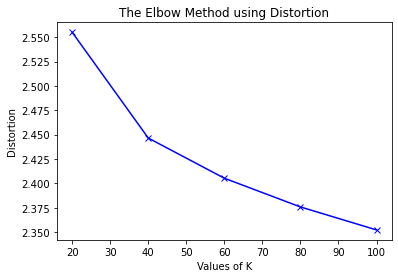

In [237]:
plt.plot(K, distortions, 'bx-')

plt.xlabel('Values of K')

plt.ylabel('Distortion')

plt.title('The Elbow Method using Distortion')

plt.show()

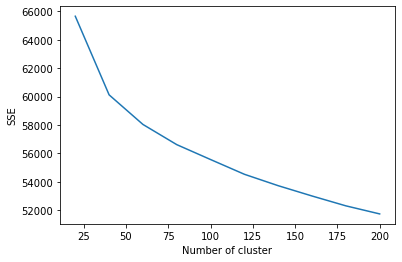

In [226]:
sse = {}
for k in range(20, 201, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [231]:
sse.keys()

dict_keys([20, 40, 60, 80, 100, 120, 140, 160, 180, 200])